### Train model
Default = ```!python train.py --config=config_target``` (https://www.immersivelimit.com/tutorials/train-yolact-with-a-custom-coco-dataset)

In [ ]:
!python train.py --config=lips_on_rmi_resnet50_config
!python train.py --config=lips_on_rmi_resnet101_config
!python train.py --config=lips_on_rmi_darknet53_config
!python train.py --config=lips_on_rmi_darknet101_700_config --batch_size=7
!python train.py --config=yolact_plus_lips_on_rmi_resnet50_config 
!python train.py --config=yolact_plus_lips_on_rmi_resnet101_config 

### View train logs

In [ ]:
from utils.logger import LogVisualizer
vis = LogVisualizer()

vis.add('logs/yolact_plus_lips_on_rmi_resnet50.log', session=0)
vis.plot('val', 'x.data.epoch', 'x.data.mask["all"]')
# vis.plot('train', 'x.data.iter * s.data.batch_size', 'x.data.loss.M', smoothness=1000)

### Test the model with images
Default = ```!python tools/demo.py image -f /content/YOLOX/exps/example/yolox_voc/yolox_voc_s.py -c {MODEL_PATH} --path {TEST_IMAGE_PATH} --conf 0.25 --nms 0.45 --tsize 640 --save_result --device gpu```

In [ ]:
IMG_PATH = r"C:\Users\gusta\OneDrive\Documentos\TCC\Dataset\Pos-notacao_120Seg\InstanceSegmentation\120Seg.v2i.coco-segmentation\test_salt_and_pepper"
CHECKPOINT = 'lips_on_rmi_darknet53_96_10000.pth'
!python eval.py --trained_model=weights/{CHECKPOINT} --score_threshold=0.15 --top_k=15 --images={IMG_PATH};./content/output_images/{CHECKPOINT} --output_web_json
CHECKPOINT = 'lips_on_rmi_resnet50_96_10000.pth'
!python eval.py --trained_model=weights/{CHECKPOINT} --score_threshold=0.15 --top_k=15 --images={IMG_PATH};./content/output_images/{CHECKPOINT} --output_web_json
CHECKPOINT = 'lips_on_rmi_resnet101_96_10000.pth'
!python eval.py --trained_model=weights/{CHECKPOINT} --score_threshold=0.15 --top_k=15 --images={IMG_PATH};./content/output_images/{CHECKPOINT} --output_web_json
CHECKPOINT = 'lips_on_rmi_resnet101_700_84_10000.pth'
!python eval.py --trained_model=weights/{CHECKPOINT} --score_threshold=0.15 --top_k=15 --images={IMG_PATH};./content/output_images/{CHECKPOINT} --output_web_json
CHECKPOINT = 'yolact_plus_lips_on_rmi_resnet50_96_10000.pth'
!python eval.py --trained_model=weights/{CHECKPOINT} --score_threshold=0.15 --top_k=15 --images={IMG_PATH};./content/output_images/{CHECKPOINT} --output_web_json
CHECKPOINT = 'yolact_plus_lips_on_rmi_resnet101_96_10000.pth'
!python eval.py --trained_model=weights/{CHECKPOINT} --score_threshold=0.15 --top_k=15 --images={IMG_PATH};./content/output_images/{CHECKPOINT} --output_web_json
    

### Process img logs

In [ ]:
import csv

def process_log(logfile_name):
    log_file_name = './weights/'+logfile_name

    file = open(log_file_name,'r')
    text = file.read() 

    csvFile = csv.writer(open(log_file_name.replace('.txt','.csv'),'w'))
    csvFile.writerow(['class','accuracy'])

    lines = text.splitlines()
    for line in lines:
        line = line.split(':')[2]
        print(line)
        csvFile.writerow((line).split('-'))
    file.close()
    
process_log('lips_on_rmi_darknet53_96_10000.pth_log.txt')
process_log('lips_on_rmi_resnet50_96_10000.pth_log.txt')
process_log('lips_on_rmi_resnet101_96_10000.pth_log.txt')
process_log('lips_on_rmi_resnet101_700_84_10000.pth_log.txt')
process_log('yolact_plus_lips_on_rmi_resnet50_96_10000.pth_log.txt')
process_log('yolact_plus_lips_on_rmi_resnet101_96_10000.pth_log.txt')

### Test the model with video
Default = ```python tools/demo.py video -f exps/example/yolox_voc/yolox_voc_s.py -c {MODEL_PATH} --path /path/to/your/video --conf 0.25 --nms 0.45 --tsize 640 --save_result --device [gpu]```

In [ ]:
VIDEO_PATH = r"C:\Users\gusta\OneDrive\Documentos\TCC\Dataset\Pre-Processamento_120Seg\original_video.mp4"

CHECKPOINT = 'lips_on_rmi_darknet53_96_10000.pth'
!python eval.py --trained_model=weights/{CHECKPOINT} --score_threshold=0.15 --top_k=15 --video_multiframe=4 --video={VIDEO_PATH};./content/output_video/{CHECKPOINT}.mp4 --display_fps
CHECKPOINT = 'lips_on_rmi_resnet50_96_10000.pth'
!python eval.py --trained_model=weights/{CHECKPOINT} --score_threshold=0.15 --top_k=15 --video_multiframe=4 --video={VIDEO_PATH};./content/output_video/{CHECKPOINT}.mp4 --display_fps
CHECKPOINT = 'lips_on_rmi_resnet101_96_10000.pth'
!python eval.py --trained_model=weights/{CHECKPOINT} --score_threshold=0.15 --top_k=15 --video_multiframe=4 --video={VIDEO_PATH};./content/output_video/{CHECKPOINT}.mp4 --display_fps
CHECKPOINT = 'lips_on_rmi_resnet101_700_84_10000.pth'
!python eval.py --trained_model=weights/{CHECKPOINT} --score_threshold=0.15 --top_k=15 --video_multiframe=4 --video={VIDEO_PATH};./content/output_video/{CHECKPOINT}.mp4 --display_fps
CHECKPOINT = 'yolact_plus_lips_on_rmi_resnet50_96_10000.pth'
!python eval.py --trained_model=weights/{CHECKPOINT} --score_threshold=0.15 --top_k=15 --video_multiframe=4 --video={VIDEO_PATH};./content/output_video/{CHECKPOINT}.mp4 --display_fps
CHECKPOINT = 'yolact_plus_lips_on_rmi_resnet101_96_10000.pth'
!python eval.py --trained_model=weights/{CHECKPOINT} --score_threshold=0.15 --top_k=15 --video_multiframe=4 --video={VIDEO_PATH};./content/output_video/{CHECKPOINT}.mp4 --display_fps

### Process video logs

In [ ]:
import csv

def process_log(logfile_name):
    log_file_name = './weights/'+logfile_name

    file = open(log_file_name,'r')
    text = file.read() 
    csvFileFPS = csv.writer(open(log_file_name.replace('.txt','FPS.csv'),'w'),)
    csvFileFPS.writerow(['FPS'])
    csvFilemAP = csv.writer(open(log_file_name.replace('.txt','mAP.csv'),'w'))
    csvFilemAP.writerow(['class','accuracy'])

    lines = text.splitlines()
    for line in lines:
        line = line.split(':')[2]
        if "fps" in line:
            csvFileFPS.writerow([float(line[:-4])])
        else:
            csvFilemAP.writerow((line).split('-'))
    file.close()

process_log('lips_on_rmi_darknet53_96_10000.pth_log.txt')
process_log('lips_on_rmi_resnet50_96_10000.pth_log.txt')
process_log('lips_on_rmi_resnet101_96_10000.pth_log.txt')
process_log('lips_on_rmi_resnet101_700_84_10000.pth_log.txt')
process_log('yolact_plus_lips_on_rmi_resnet50_96_10000.pth_log.txt')
process_log('yolact_plus_lips_on_rmi_resnet101_96_10000.pth_log.txt')

### Process and get csvs from train logs


In [ ]:
import csv, json
 
def process_log(logfile_name):
    logfile = open('./logs/'+logfile_name)
    log_text = logfile.read()
    log_text = log_text.splitlines()

    # CSV Structure
    # -> value
    # -> iter
    # -> epoch
    
    loss = csv.writer(open('./logs/csv/loss_'+logfile_name.replace('.log','.csv'),'w',newline='', encoding='utf-8'))
    val_box = csv.writer(open('./logs/csv/val_box_'+logfile_name.replace('.log','.csv'),'w',newline='', encoding='utf-8'))
    val_mask = csv.writer(open('./logs/csv/val_mask_'+logfile_name.replace('.log','.csv'),'w',newline='', encoding='utf-8'))

    loss.writerow(['B','M','C','S','T','epoch','iter'])
    val_box.writerow(['all','50','55','60','65','70','75','80','85','90','95','epoch','iter'])
    val_mask.writerow(['all','50','55','60','65','70','75','80','85','90','95','epoch','iter'])
    
    for line in log_text:
        line_dict = json.loads(line)
        # Loss log
        if line_dict['type'] == 'train':
            loss_data = line_dict['data']['loss']
            loss.writerow([loss_data['B'],loss_data['M'],loss_data['C'],loss_data['S'],loss_data['T'],line_dict['data']['epoch'],line_dict['data']['iter']])
        # Val log
        if line_dict['type'] == 'val':
            val_data_box = line_dict['data']['box']
            val_data_mask = line_dict['data']['mask']
            val_box.writerow([val_data_box['all'],val_data_box['50'],val_data_box['55'],val_data_box['60'],val_data_box['65'],val_data_box['70'],val_data_box['75'],val_data_box['80'],val_data_box['85'],val_data_box['90'],val_data_box['95'],line_dict['data']['epoch'],line_dict['data']['iter']])
            val_mask.writerow([val_data_mask['all'],val_data_mask['50'],val_data_mask['55'],val_data_mask['60'],val_data_mask['65'],val_data_mask['70'],val_data_mask['75'],val_data_mask['80'],val_data_mask['85'],val_data_mask['90'],val_data_mask['95'],line_dict['data']['epoch'],line_dict['data']['iter']])
    
process_log('lips_on_rmi_darknet53.log')
process_log('lips_on_rmi_resnet50.log')
process_log('lips_on_rmi_resnet101_700.log')
process_log('lips_on_rmi_resnet101.log')
process_log('yolact_plus_lips_on_rmi_resnet50.log')
process_log('yolact_plus_lips_on_rmi_resnet101.log')

### Plot CSVs

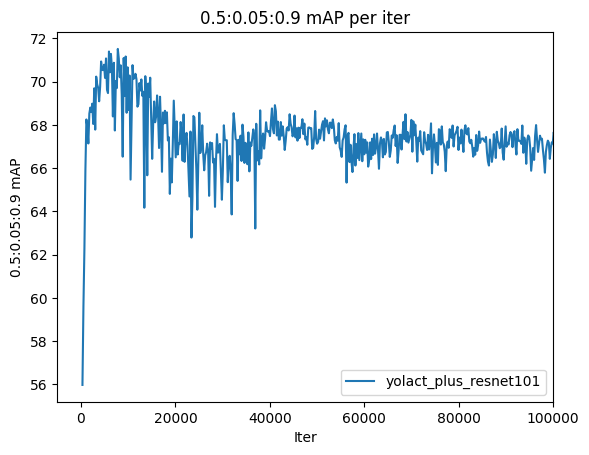

In [25]:
import pandas
import matplotlib.pyplot as pyplot
def plot_csv_box_loss(file_name):
    data = pandas.read_csv('./logs/csv/'+file_name)
    B = data['B'].tolist()
    iter = data['iter'].tolist()
    # pyplot.plot(iter,B,label=file_name.split("_")[-1].replace('.csv',''))
    # pyplot.plot(iter,B,label=(file_name.split("_")[-2]+'_'+file_name.split("_")[-1]).replace('.csv',''))
    pyplot.plot(iter,B,label="yolact_plus_resnet101")
    pyplot.xlabel('Iter')
    pyplot.ylabel('Loss')
    pyplot.xticks(range(0,100001,20000))
    pyplot.xlim(right=100000)
    pyplot.yticks(range(0,7,1))
    pyplot.title('Box Locallization Loss per iter')
    pyplot.legend(loc='upper right')
    pyplot.show()

def plot_csv_val(file_name):
    data = pandas.read_csv('./logs/csv/'+file_name)
    all = data['all'].tolist()
    iter = data['iter'].tolist()
    pyplot.plot(iter,all,"-",label="yolact_plus_resnet101")
    # pyplot.plot(iter,all,"-",label=file_name.split("_")[-1].replace('.csv',''))
    # pyplot.plot(iter,all,"-",label=(file_name.split("_")[-2]+'_'+file_name.split("_")[-1]).replace('.csv',''))
    pyplot.xlabel('Iter')
    pyplot.ylabel('0.5:0.05:0.9 mAP')
    pyplot.xticks(range(0,100001,20000))
    pyplot.xlim(right=100000)
    pyplot.legend(loc='lower right')
    pyplot.title('0.5:0.05:0.9 mAP per iter')
    pyplot.show()

def plot_csv_val_box_all():
    darknet53 = pandas.read_csv('./logs/csv/'+'val_box_lips_on_rmi_darknet53.csv')
    resnet50 = pandas.read_csv('./logs/csv/'+'val_box_lips_on_rmi_resnet50.csv')
    resnet101 = pandas.read_csv('./logs/csv/'+'val_box_lips_on_rmi_resnet101.csv')
    resnet101_700 = pandas.read_csv('./logs/csv/'+'val_box_lips_on_rmi_resnet101_700.csv')
    yolact_plus_resnet50 = pandas.read_csv('./logs/csv/'+'val_box_yolact_plus_lips_on_rmi_resnet50.csv')
    yolact_plus_resnet101 = pandas.read_csv('./logs/csv/'+'val_box_yolact_plus_lips_on_rmi_resnet101.csv')
 
    pyplot.plot(darknet53['iter'].tolist(),darknet53['all'].tolist(),"p--",label="darknet53")
    pyplot.plot(resnet50['iter'].tolist(),resnet50['all'].tolist(),"s--",label="resnet50")
    pyplot.plot(resnet101['iter'].tolist(),resnet101['all'].tolist(),"o--",label="resnet101")
    pyplot.plot(resnet101_700['iter'].tolist(),resnet101_700['all'].tolist(),"v--",label="resnet101_700")
    pyplot.plot(yolact_plus_resnet50['iter'].tolist(),yolact_plus_resnet50['all'].tolist(),"<--",label="yolact_plus_resnet50")
    pyplot.plot(yolact_plus_resnet101['iter'].tolist(),yolact_plus_resnet101['all'].tolist(),">--",label="yolact_plus_resnet101")
    pyplot.xlabel('Iter')
    pyplot.ylabel('0.5:0.05:0.9 mAP')
    pyplot.xticks(range(0,100001,20000))
    pyplot.xlim(right=100000)
    pyplot.legend(loc='lower right')
    pyplot.title('0.5:0.05:0.9 mAP per iter')
    pyplot.show()

def plot_csv_val_mask_all():
    darknet53 = pandas.read_csv('./logs/csv/'+'val_mask_lips_on_rmi_darknet53.csv')
    resnet50 = pandas.read_csv('./logs/csv/'+'val_mask_lips_on_rmi_resnet50.csv')
    resnet101 = pandas.read_csv('./logs/csv/'+'val_mask_lips_on_rmi_resnet101.csv')
    resnet101_700 = pandas.read_csv('./logs/csv/'+'val_mask_lips_on_rmi_resnet101_700.csv')
    yolact_plus_resnet50 = pandas.read_csv('./logs/csv/'+'val_mask_yolact_plus_lips_on_rmi_resnet50.csv')
    yolact_plus_resnet101 = pandas.read_csv('./logs/csv/'+'val_mask_yolact_plus_lips_on_rmi_resnet101.csv')
 
    pyplot.plot(darknet53['iter'].tolist(),darknet53['all'].tolist(),"-",label="darknet53")
    pyplot.plot(resnet50['iter'].tolist(),resnet50['all'].tolist(),"-",label="resnet50")
    pyplot.plot(resnet101['iter'].tolist(),resnet101['all'].tolist(),"-",label="resnet101")
    pyplot.plot(resnet101_700['iter'].tolist(),resnet101_700['all'].tolist(),"-",label="resnet101_700")
    pyplot.plot(yolact_plus_resnet50['iter'].tolist(),yolact_plus_resnet50['all'].tolist(),"-",label="yolact_plus_resnet50")
    pyplot.plot(yolact_plus_resnet101['iter'].tolist(),yolact_plus_resnet101['all'].tolist(),"-",label="yolact_plus_resnet101")
    pyplot.xlabel('Iter')
    pyplot.ylabel('0.5:0.05:0.9 mAP')
    pyplot.xticks(range(0,100001,20000))
    pyplot.xlim(right=100000)
    pyplot.legend(loc='lower right')
    pyplot.title('0.5:0.05:0.9 mAP per iter')
    pyplot.show()



# plot_csv_box_loss('loss_lips_on_rmi_darknet53.csv')
# plot_csv_box_loss('loss_lips_on_rmi_resnet50.csv')
# plot_csv_box_loss('loss_lips_on_rmi_resnet101.csv')
# plot_csv_box_loss('loss_lips_on_rmi_resnet101_700.csv')
# plot_csv_box_loss('loss_yolact_plus_lips_on_rmi_resnet50.csv')
# plot_csv_box_loss('loss_yolact_plus_lips_on_rmi_resnet101.csv')

# plot_csv_val('val_box_lips_on_rmi_darknet53.csv')
# plot_csv_val('val_box_lips_on_rmi_resnet50.csv')
# plot_csv_val('val_box_lips_on_rmi_resnet101.csv')
# plot_csv_val('val_box_lips_on_rmi_resnet101_700.csv')
# plot_csv_val('val_box_yolact_plus_lips_on_rmi_resnet50.csv')
# plot_csv_val('val_box_yolact_plus_lips_on_rmi_resnet101.csv')

# plot_csv_val('val_mask_lips_on_rmi_darknet53.csv')
# plot_csv_val('val_mask_lips_on_rmi_resnet50.csv')
# plot_csv_val('val_mask_lips_on_rmi_resnet101.csv')
# plot_csv_val('val_mask_lips_on_rmi_resnet101_700.csv')
# plot_csv_val('val_mask_yolact_plus_lips_on_rmi_resnet50.csv')
plot_csv_val('val_mask_yolact_plus_lips_on_rmi_resnet101.csv')

# plot_csv_val_box_all()
# plot_csv_val_mask_all()

### Apply filters in test dataset 

#### Gaussian blur (https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1)

In [ ]:
import cv2, os

img_dir = r"C:\Users\gusta\OneDrive\Documentos\TCC\Dataset\Pos-notacao_120Seg\InstanceSegmentation\120Seg.v2i.coco-segmentation\test"
save_dir = r"C:\Users\gusta\OneDrive\Documentos\TCC\Dataset\Pos-notacao_120Seg\InstanceSegmentation\120Seg.v2i.coco-segmentation\test_gaussian_blur"

for filename in os.listdir(img_dir):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(img_dir,filename))
        result = cv2.GaussianBlur(img,(5,5),cv2.BORDER_DEFAULT)     
        cv2.imwrite(os.path.join(save_dir,filename),result)


#### Denoise filter (https://docs.opencv.org/4.x/d1/d79/group__photo__denoise.html#ga76abf348c234cecd0faf3c42ef3dc715)

In [ ]:
import cv2, os

img_dir = r"C:\Users\gusta\OneDrive\Documentos\TCC\Dataset\Pos-notacao_120Seg\InstanceSegmentation\120Seg.v2i.coco-segmentation\test"
save_dir = r"C:\Users\gusta\OneDrive\Documentos\TCC\Dataset\Pos-notacao_120Seg\InstanceSegmentation\120Seg.v2i.coco-segmentation\test_denoise"

for filename in os.listdir(img_dir):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(img_dir,filename))
        result = cv2.fastNlMeansDenoising(img,None,20,7,21)     
        cv2.imwrite(os.path.join(save_dir,filename),result)

#### Gaussian Noise (https://www.kaggle.com/code/chanduanilkumar/adding-and-removing-image-noise-in-python/notebook)

In [ ]:
import cv2, os
import numpy as np

img_dir = r"C:\Users\gusta\OneDrive\Documentos\TCC\Dataset\Pos-notacao_120Seg\InstanceSegmentation\120Seg.v2i.coco-segmentation\test"
save_dir = r"C:\Users\gusta\OneDrive\Documentos\TCC\Dataset\Pos-notacao_120Seg\InstanceSegmentation\120Seg.v2i.coco-segmentation\test_gaussian_noise"


for filename in os.listdir(img_dir):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(img_dir,filename))
        gauss_noise = np.random.normal(0,0.5,img.size)
        gauss_noise = gauss_noise.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
        result=cv2.add(img,gauss_noise)
        cv2.imwrite(os.path.join(save_dir,filename),result)

### Salt&Pepper Noise (https://gist.github.com/lucaswiman/1e877a164a69f78694f845eab45c381a)

In [ ]:
import cv2, os
import numpy as np

img_dir = r"C:\Users\gusta\OneDrive\Documentos\TCC\Dataset\Pos-notacao_120Seg\InstanceSegmentation\120Seg.v2i.coco-segmentation\test"
save_dir = r"C:\Users\gusta\OneDrive\Documentos\TCC\Dataset\Pos-notacao_120Seg\InstanceSegmentation\120Seg.v2i.coco-segmentation\test_salt&pepper"


for filename in os.listdir(img_dir):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(img_dir,filename))
        prob = 0.1
        if len(img.shape) == 2:
            black = 0
            white = 255            
        else:
            colorspace = img.shape[2]
            if colorspace == 3:  # RGB
                black = np.array([0, 0, 0], dtype='uint8')
                white = np.array([255, 255, 255], dtype='uint8')
            else:  # RGBA
                black = np.array([0, 0, 0, 255], dtype='uint8')
                white = np.array([255, 255, 255, 255], dtype='uint8')
        probs = np.random.random(img.shape[:2])
        img[probs < (prob / 2)] = black
        img[probs > 1 - (prob / 2)] = white
        
        cv2.imwrite(os.path.join(save_dir,filename),img)